In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
customers = pd.read_csv(r"C:\Users\ADMIN\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\ADMIN\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\ADMIN\Downloads\Transactions.csv")

In [9]:
customers
products
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [15]:
customers.shape
products.shape
transactions.shape

(1000, 7)

In [19]:
customers.head
products.head()
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [27]:
print("Customers Dataset Info:")
customers.info()

print("\nProducts Dataset Info:")
products.info()

print("\nTransactions Dataset Info:")
transactions.info()

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     

In [29]:
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())


Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [31]:
print("\nDuplicate Rows in Transactions:", transactions.duplicated().sum())



Duplicate Rows in Transactions: 0


In [33]:
combined_data = pd.merge(transactions, products, on="ProductID", how="left")
combined_data = pd.merge(combined_data, customers, on="CustomerID", how="left")

In [37]:
combined_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [39]:
category_revenue = combined_data.groupby('Category')['TotalValue'].sum().reset_index()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8848\2152881506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='TotalValue', data=category_revenue, palette="Blues_d")


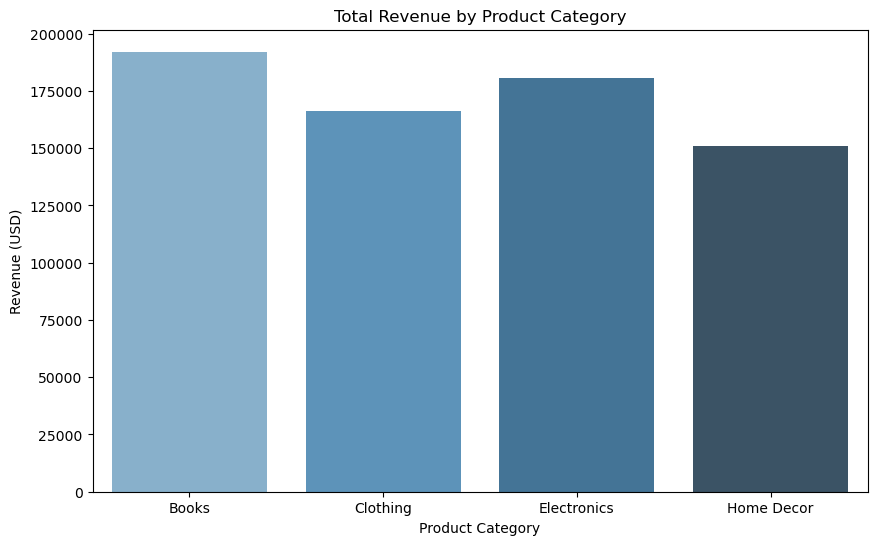

In [43]:
#Total revenue by product category

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='TotalValue', data=category_revenue, palette="Blues_d")
plt.title('Total Revenue by Product Category')
plt.ylabel('Revenue (USD)')
plt.xlabel('Product Category')
plt.show()

In [57]:
#Top 5 Products by Revenue:

top_products = combined_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Revenue:")
top_products


Top 5 Products by Revenue:


ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8848\1505198127.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='TotalValue', data=region_revenue, palette="coolwarm")


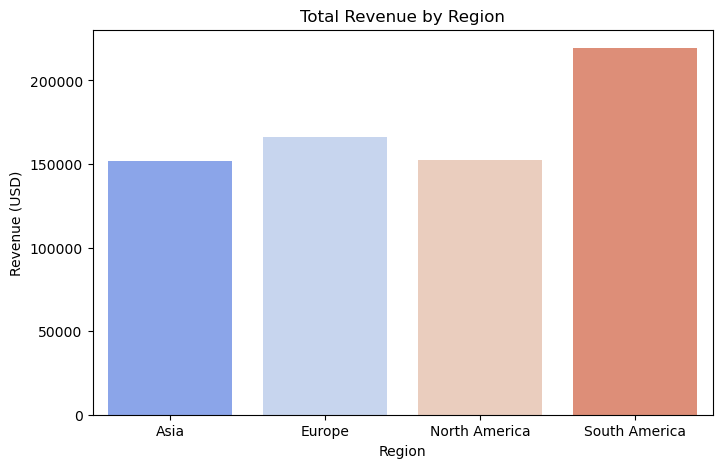

In [59]:
#Total revenue by region

region_revenue = combined_data.groupby('Region')['TotalValue'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='TotalValue', data=region_revenue, palette="coolwarm")
plt.title('Total Revenue by Region')
plt.ylabel('Revenue (USD)')
plt.xlabel('Region')
plt.show()


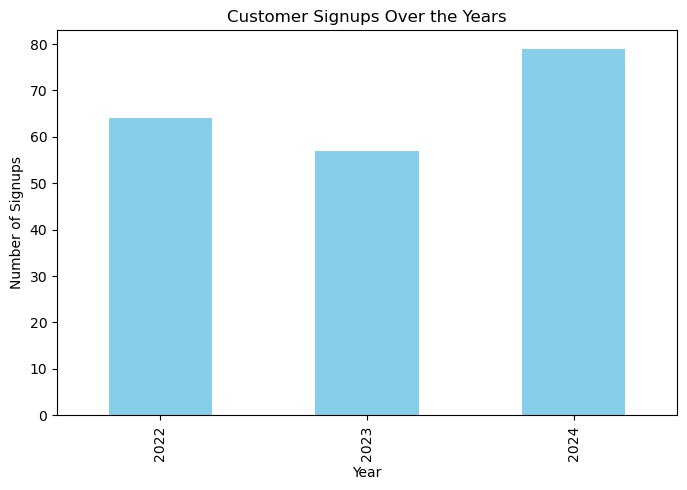

In [51]:
# Convert SignupDate to datetime

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year

signup_trends = customers['SignupYear'].value_counts().sort_index()


plt.figure(figsize=(8, 5))
signup_trends.plot(kind='bar', color='skyblue')
plt.title('Customer Signups Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

In [61]:
#Transaction count per customer

customer_transactions = transactions['CustomerID'].value_counts().head(5)
print("Top 5 Customers by Transaction Count:")
customer_transactions


Top 5 Customers by Transaction Count:


CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
Name: count, dtype: int64